In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
pd.set_option('display.max_columns', 300)
df = pd.read_csv('/content/drive/MyDrive/df_done.csv')
df = df[df['s_teukbyul_si/do'] == '부산광역시']
df

##1차 클러스터링(지역 및 비슷한 운행으로 군집)

###지역 원핫인코딩(부산으로만 필터링하면 안해도 될듯)

In [ ]:
#df = pd.get_dummies(data = df, columns = ['s_teukbyul_si/do'], prefix = 's_teukbyul_si/do')

###정규화

In [54]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df[['duration(min)', 'root_dist(km)']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

##모델링

In [68]:
from sklearn.cluster import KMeans

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)

In [69]:
df.cluster.value_counts()

0    10823
4     1806
1     1109
2      250
3        2
Name: cluster, dtype: int64

In [ ]:
df[df.cluster == 1]

##최적의 k 찾기(엘보우 기법)

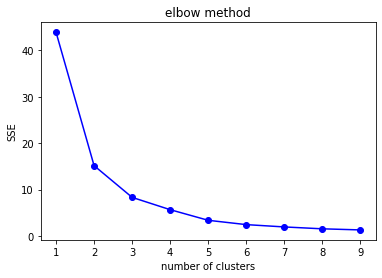

In [71]:
# 엘보우 기법 (오차제곱합의 값이 최소가 되도록 결정하는 방법)
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(data_scale, 10)

###클러스터링 시각화

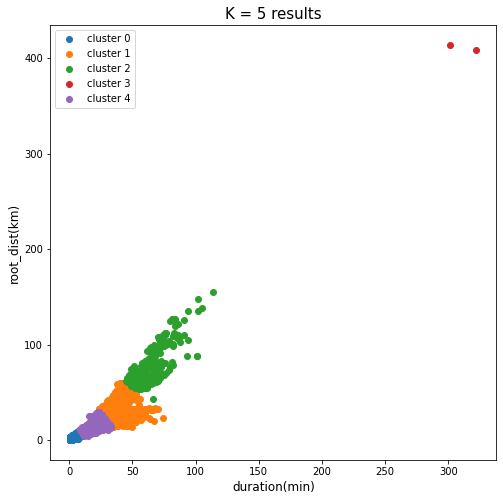

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'duration(min)'], df.loc[df['cluster'] == i, 'root_dist(km)'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('duration(min)', size = 12)
plt.ylabel('root_dist(km)', size = 12)
plt.show()

##2차 클러스터링(성향을 기준으로 클러스터링)

##속도 파생변수 생성

In [ ]:
df

In [ ]:
df[vel] = 

###파생변수 생성후 다시 2차 클러스터링 진행

In [64]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

In [ ]:
df0

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df0[['max_rpm', 'root_dist(km)']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [ ]:
from sklearn.cluster import KMeans

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)